1 [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
We have 1 GPUs

[<_io.BufferedReader name='../random/865267'>, <_io.BufferedReader name='../random/435394'>, <_io.BufferedReader name='../random/645945'>, <_io.BufferedReader name='../random/386992'>, <_io.BufferedReader name='../random/434557'>, <_io.BufferedReader name='../random/568735'>, <_io.BufferedReader name='../random/633768'>, <_io.BufferedReader name='../random/020879'>, <_io.BufferedReader name='../random/760141'>, <_io.BufferedReader name='../random/821303'>, <_io.BufferedReader name='../random/634098'>, <_io.BufferedReader name='../random/779223'>, <_io.BufferedReader name='../random/616464'>, <_io.BufferedReader name='../random/534526'>, <_io.BufferedReader name='../random/958388'>, <_io.BufferedReader name='../random/194723'>, <_io.BufferedReader name='../random/863716'>, <_io.BufferedReader name='../random/405151'>, <_io.BufferedReader name='../random/930036'>, <_io.BufferedReader name='../random/4425

`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


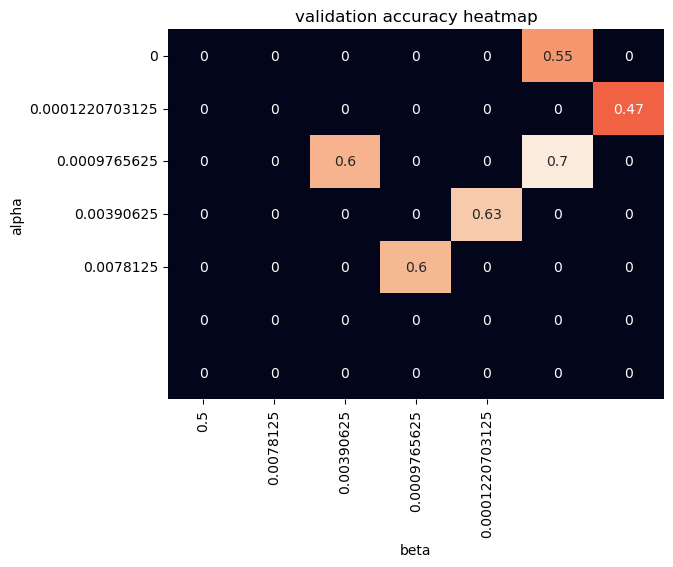

(0.253545343875885, '568735')

In [18]:
import argparse
import pickle

import numpy as np
from supervised.util import load_most_recent_results_with_fnames as load_most_recent_results
from supervised.evaluations.image_classification import show_mask
from itertools import product
from supervised.util import dict_to_string, prep_gpu

import matplotlib.pyplot as plt
import seaborn as sn

prep_gpu(12, 1, False)

shape = [7, 7]
hparams = ['alpha', 'beta']
direc = '../random'
metric = 'val_clam_categorical_accuracy'

most_recent, fnames = load_most_recent_results(direc, -1)

grid = np.zeros(tuple(shape))
counts = np.zeros(tuple(shape))

fnames_grid = np.zeros_like(grid).astype(np.str)
print(fnames)
fnames = [str(fname).split("'")[-2].split('/')[-1] for fname in fnames]

values = {hpar: set() for hpar in hparams}
# query the values along the axis
for results in most_recent:
    for hpar in hparams:
        values[hpar].add(results.config.network_params['network_args'][hpar])

values = {hpar: sorted(list(values[hpar])) for hpar in hparams}
# put the metric in the appropriate position for each model
for results, fname in zip(most_recent, fnames):
    result_coord = [0 for hpar in hparams]

    for i, hpar in enumerate(hparams):
        result_coord[i] = values[hpar].index(results.config.network_params['network_args'][hpar])
    try:
        grid[tuple(result_coord)] += results.model_data.history[metric][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1]
    except:
        print(fname)
    counts[tuple(result_coord)] += 1
    
    fnames_grid[tuple(result_coord)] = fname

counts = np.maximum(np.ones_like(counts), counts)
grid /= counts
    
print(dict_to_string(values))

print(np.flip(grid, 1))
print(np.flip(fnames_grid, 1))

sn.heatmap(np.flip(grid, 1), cbar=False, annot=True, xticklabels=values[hparams[1]][::-1],
           yticklabels=values[hparams[0]])
plt.xlabel(hparams[1])
plt.ylabel(hparams[0])
# plt.title(metric + ' heatmap')
plt.title('validation accuracy heatmap')
plt.show()

# sum(results.model_data.run_time for results in most_recent) / (3600*24)
"""max([(abs(results.model_data.history['val_clam_categorical_accuracy'][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1] - (1 / 3)) - abs((1 / 3) - results.model_data.history['val_clam_1_categorical_accuracy'][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1]), fname) for results, fname in zip(most_recent, fnames)], key=lambda k: k[0])"""

max([(results.model_data.history['val_clam_categorical_accuracy'][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1] - results.model_data.history['val_clam_1_categorical_accuracy'][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1], fname) for results, fname in zip(most_recent, fnames) if results.model_data.history['val_clam_categorical_accuracy'][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1] > .87 if 'cats' in str(results.config.dataset_params['dset_fn'])], key=lambda k: k[0])



In [2]:
import tensorflow_datasets as tfds
import tensorflow as tf
with open('../random/020879', 'rb') as fp:
    results = pickle.load(fp)

test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']
test_dset = test_dset.batch(results.config.dataset_params['batch'])

results.summary()

results.model_data.get_model().evaluate(test_dset)

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


tf.Tensor([[8195. 8088.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.50328565 0.49671435]], shape=(1, 2), dtype=float32) (16283, 2)


Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


tf.Tensor([[1183. 1144.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.5083799  0.49162012]], shape=(1, 2), dtype=float32) (2327, 2)


Corrupt JPEG data: 164 extraneous bytes before marker 0xd9
Corrupt JPEG data: 259 extraneous bytes before marker 0xd9
Corrupt JPEG data: 217 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1408 extraneous bytes before marker 0xd9


tf.Tensor([[2280. 2372.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.49011177 0.50988823]], shape=(1, 2), dtype=float32) (4652, 2)


Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


------------------------------------------------------------
Experimental Results Summary (Index: 0)
------------------------------------------------------------
Dataset Params: {
	dset_fn: <function cats_dogs at 0x2ad3763f1ea0>
	dset_args: {
		image_size: (128, 128)
		path: ../data/
		}
	cache: False
	cache_to_lscratch: False
	batch: 194
	prefetch: 8
	shuffle: True
	augs: [<function custom_rand_augment_dset at 0x2ad37869a680>]
	}

Network Params:  {
	network_fn: <function build_camnet_reorderedv5 at 0x2ad3763f1900>
	network_args: {
		hyperband: False
		lrate: 0.001
		dense_layers: [32, 16]
		conv_filters: 32
		image_size: (128, 128, 3)
		l2: None
		n_classes: 2
		depth: 5
		noise_level: 0.005
		conv_size: [3]
		l1: None
		alpha: 0.0009765625
		iterations: 3
		beta: 0.0009765625
		learning_rate: 0.0005
		}
	hyperband: False
	}
------------------------------------------------------------
Experiment Parameters: {
	seed: 42
	steps_per_epoch: 512
	validation_steps: 256
	patience: 16
	min_

2023-01-22 13:14:53.724445: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512
2023-01-22 13:14:53.851236: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


24/24 [==============================] - 35s 832ms/step - loss: 0.4011 - clam_loss: 0.3984 - tf.math.multiply_4_loss: 2.1554 - clam_1_loss: 0.6031 - clam_categorical_accuracy: 0.8463 - clam_1_categorical_accuracy: 0.5658


[0.4011096954345703,
 0.39841586351394653,
 2.1554479598999023,
 0.6031004786491394,
 0.8463026881217957,
 0.5657781362533569]

In [27]:
print(value.shape[0])

20000


`np.str` is a deprecated alias for the builtin `str`. To silence this warning, use `str` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.str_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations


[<_io.BufferedReader name='../results/069458'>, <_io.BufferedReader name='../results/120238'>, <_io.BufferedReader name='../results/933906'>, <_io.BufferedReader name='../results/425644'>, <_io.BufferedReader name='../results/850784'>, <_io.BufferedReader name='../results/020782'>, <_io.BufferedReader name='../results/622526'>, <_io.BufferedReader name='../results/219077'>, <_io.BufferedReader name='../results/492239'>, <_io.BufferedReader name='../results/382542'>, <_io.BufferedReader name='../results/303147'>, <_io.BufferedReader name='../results/559428'>, <_io.BufferedReader name='../results/245873'>, <_io.BufferedReader name='../results/508147'>, <_io.BufferedReader name='../results/356496'>, <_io.BufferedReader name='../results/094267'>, <_io.BufferedReader name='../results/853828'>, <_io.BufferedReader name='../results/342466'>, <_io.BufferedReader name='../results/005873'>, <_io.BufferedReader name='../results/792035'>, <_io.BufferedReader name='../results/087332'>, <_io.Buffere

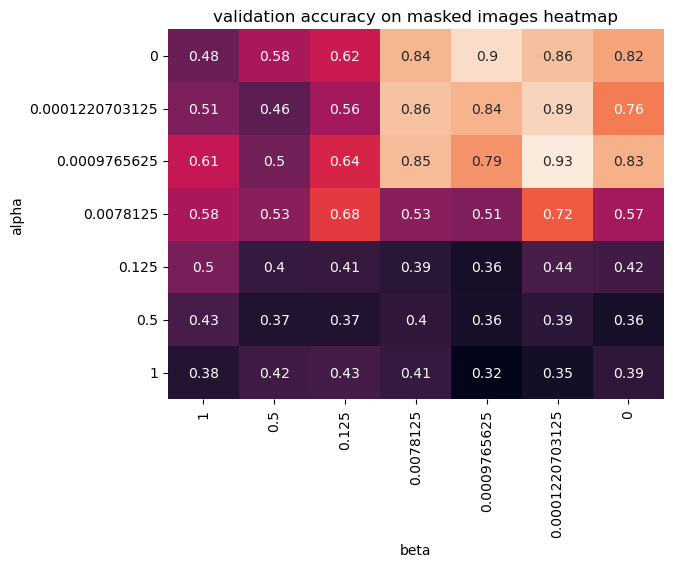

In [4]:
shape = [7, 7]
hparams = ['alpha', 'beta']
direc = '../results'
metric2 = 'val_clam_1_categorical_accuracy'

most_recent, fnames = load_most_recent_results(direc, -1)

grid2 = np.zeros(tuple(shape))
counts2 = np.zeros(tuple(shape))

fnames_grid = np.zeros_like(grid).astype(np.str)
print(fnames)
fnames = [str(fname).split("'")[-2].split('/')[-1] for fname in fnames]

values = {hpar: set() for hpar in hparams}
# query the values along the axis
for results in most_recent:
    for hpar in hparams:
        values[hpar].add(results.config.network_params['network_args'][hpar])

values = {hpar: sorted(list(values[hpar])) for hpar in hparams}
# put the metric in the appropriate position for each model
for results, fname in zip(most_recent, fnames):
    result_coord = [0 for hpar in hparams]

    for i, hpar in enumerate(hparams):
        result_coord[i] = values[hpar].index(results.config.network_params['network_args'][hpar])

    grid2[tuple(result_coord)] += results.model_data.history[metric2][len(results.model_data.history['loss']) -
                                                                        results.config.experiment_params['patience']
                                                                        - 1]
    counts2[tuple(result_coord)] += 1
    
    fnames_grid[tuple(result_coord)] = fname

counts2 = np.maximum(np.ones_like(counts2), counts2)
grid2 /= counts2
    
print(dict_to_string(values))

print(np.flip(grid2, 1))
print(np.flip(fnames_grid, 1))

sn.heatmap(np.flip(grid2, 1), cbar=False, annot=True, xticklabels=values[hparams[1]][::-1],
           yticklabels=values[hparams[0]])
plt.xlabel(hparams[1])
plt.ylabel(hparams[0])
plt.title('validation accuracy on masked images heatmap')
plt.show()

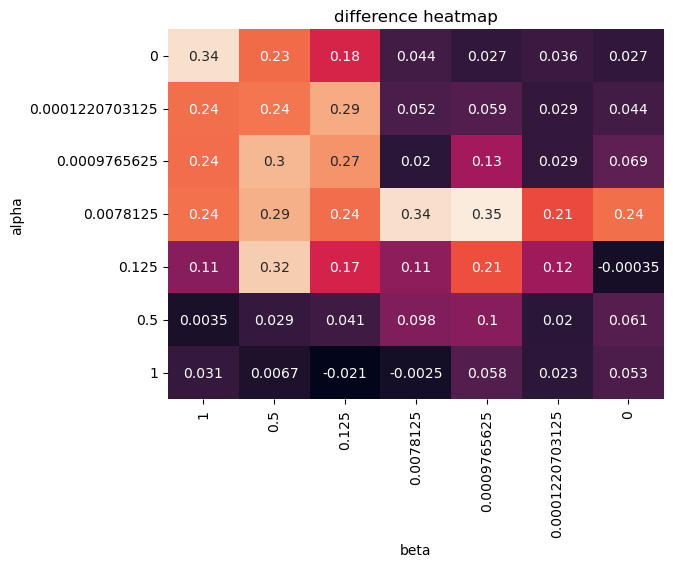

[['424978' '851918' '947169' '806269' '096786' '075284' '688652']
 ['387656' '236109' '230073' '491709' '446034' '007016' '302605']
 ['065342' '520921' '928679' '336814' '270075' '071698' '631077']
 ['717652' '265134' '224008' '041674' '783911' '416678' '611896']
 ['408323' '782908' '872666' '317143' '002667' '019787' '139903']
 ['977744' '279644' '918699' '213233' '047866' '343132' '012639']
 ['075672' '121584' '868996' '864957' '682741' '946412' '507206']]


In [5]:
sn.heatmap(np.flip(grid - grid2, 1), cbar=False, annot=True, xticklabels=values[hparams[1]][::-1],
           yticklabels=values[hparams[0]])
plt.xlabel(hparams[1])
plt.ylabel(hparams[0])
plt.title('difference heatmap')
plt.show()
print(np.flip(fnames_grid, 1))

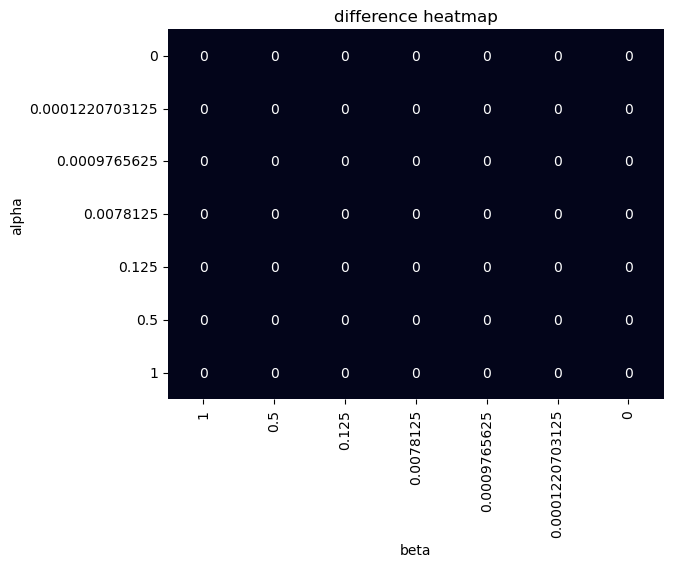

[]
0


In [6]:
shape = [7, 7]
hparams = ['alpha', 'beta']
direc = '../results'

count = np.zeros(tuple(shape))

values = {hpar: set() for hpar in hparams}
# query the values along the axis
for results in most_recent:
    for hpar in hparams:
        values[hpar].add(results.config.network_params['network_args'][hpar])

values = {hpar: sorted(list(values[hpar])) for hpar in hparams}
# put the metric in the appropriate position for each model
for results, fname in zip(most_recent, fnames):
    
    for i, hpar in enumerate(hparams):
        result_coord[i] = values[hpar].index(results.config.network_params['network_args'][hpar])

    count[tuple(result_coord)] += 1

threes = np.ones_like(count) * 3
remaining = np.minimum(count - threes, np.zeros_like(count))

sn.heatmap(np.flip(remaining, 1), cbar=False, annot=True, xticklabels=values[hparams[1]][::-1],
           yticklabels=values[hparams[0]])
plt.xlabel(hparams[1])
plt.ylabel(hparams[0])
plt.title('difference heatmap')
plt.show()

indicies_unfinished = [i for i in zip(*[j for j in remaining.nonzero()])]

alpha_beta_reps = [(values['alpha'][i], values['beta'][j], -1*remaining[i, j]) for i, j in indicies_unfinished]

print(sorted(alpha_beta_reps, key=lambda k: k[-1], reverse=True))
print(len(alpha_beta_reps))


#### with open('../random/' + np.flip(fnames_grid, 1).flatten()[np.argmax(np.flip((grid - grid2), 1))], 'rb') as fp:
#    results = pickle.load(fp)
# '../fullrezdot/288538'
with open('../fullrezdot/600885', 'rb') as fp:
    results = pickle.load(fp)

results.summary()
results.config.dataset_params['dset_args']['path'] = '../data/'
class_names = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names']
model_data = results.model_data
keras_model = model_data.get_model()
test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']

test_dset = test_dset.batch(results.config.dataset_params['batch'])

show_mask(test_dset, 32, model_data, class_names=class_names)

In [5]:
with open('../random/569259', 'rb') as fp:
    results = pickle.load(fp)

results.summary()


------------------------------------------------------------
Experimental Results Summary (Index: 0)
------------------------------------------------------------
Dataset Params: {
	dset_fn: <function circles_squares at 0x2b6ca71e5e10>
	dset_args: {
		image_size: (64, 64)
		path: ../data/
		}
	cache: False
	cache_to_lscratch: False
	batch: 64
	prefetch: 8
	shuffle: True
	augs: []
	}

Network Params:  {
	network_fn: <function build_camnet_reorderedv5 at 0x2b6ca5df9c60>
	network_args: {
		hyperband: False
		beta: 0.0009765625
		image_size: (64, 64, 3)
		alpha: 0.0009765625
		l2: None
		conv_size: [3]
		dense_layers: [32, 16]
		noise_level: 0.005
		learning_rate: 0.0005
		n_classes: 2
		l1: None
		lrate: 0.001
		iterations: 3
		conv_filters: 32
		depth: 4
		}
	hyperband: False
	}
------------------------------------------------------------
Experiment Parameters: {
	seed: 42
	steps_per_epoch: 512
	validation_steps: 256
	patience: 10
	min_delta: 0.0
	epochs: 512
	nogo: False
	}

Experiment 

In [2]:
# next, find the predictions that are correct and incorrect
from supervised.evaluations.image_classification import masking_evaluation
# '../fullrezdot/288538'
# '../random/685321'
# '../random/568735'
# '../results/806269' - highest accuracy (dot)
# '../results/411728' - highest difference (dot)
# '../random/020879' - highest difference (cd)
with open('../results/806269', 'rb') as fp:
    results = pickle.load(fp)

results.summary()
results.config.dataset_params['dset_args']['path'] = '../data/'
class_names = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names']
model_data = results.model_data

test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']

test_dset = test_dset.batch(results.config.dataset_params['batch'])

masking_evaluation(model_data, test_dset, class_names, 0)


------------------------------------------------------------
Experimental Results Summary (Index: 45)
------------------------------------------------------------
Dataset Params: {
	dset_fn: <function dot_dataset at 0x2b4e57789a20>
	dset_args: {
		image_size: (128, 128)
		path: ../data/
		}
	cache: False
	cache_to_lscratch: False
	batch: 32
	prefetch: 4
	shuffle: True
	augs: []
	}

Network Params:  {
	network_fn: <function build_camnet_reorderedv5 at 0x2b4dd1afd990>
	network_args: {
		hyperband: False
		depth: 5
		l2: None
		n_classes: 3
		lrate: 0.0005
		learning_rate: 0.0005
		alpha: 0.0
		conv_filters: [12]
		image_size: (128, 128, 3)
		dense_layers: [32, 16]
		beta: 0.0078125
		noise_level: 0.005
		iterations: 6
		l1: None
		conv_size: [3]
		}
	hyperband: False
	}
------------------------------------------------------------
Experiment Parameters: {
	seed: 42
	steps_per_epoch: 512
	validation_steps: 256
	patience: 32
	min_delta: 0.0
	epochs: 256
	nogo: False
	}

Experiment Runtime:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(None, 128, 128, 4)
dry


2023-01-22 13:25:03.296518: W tensorflow/stream_executor/gpu/asm_compiler.cc:80] Couldn't get ptxas version string: INTERNAL: Running ptxas --version returned 32512
2023-01-22 13:25:03.380985: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] INTERNAL: ptxas exited with non-zero error code 32512, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


1/1 [==============================] - 7s 7s/step
(None, 128, 128, 4)
1/1 [==============================] - 2s 2s/step
tf.Tensor([11  3], shape=(2,), dtype=int32)
1/1 [==============================] - 0s 99ms/step
(None, 128, 128, 4)
1/1 [==============================] - 2s 2s/step
tf.Tensor([8 3], shape=(2,), dtype=int32)
1/1 [==============================] - 0s 95ms/step


Exception ignored in: <function WeakKeyDictionary.__init__.<locals>.remove at 0x2b4db3513eb0>
Traceback (most recent call last):
  File "/home/fagg/miniconda3/envs/tf_bleeding5/lib/python3.10/weakref.py", line 370, in remove
    def remove(k, selfref=ref(self)):
KeyboardInterrupt: 


KeyboardInterrupt: 

.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(None, 128, 128, 4)
60/60 [==============================] - 14s 141ms/step
(1899, 3) (1899, 3)
.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


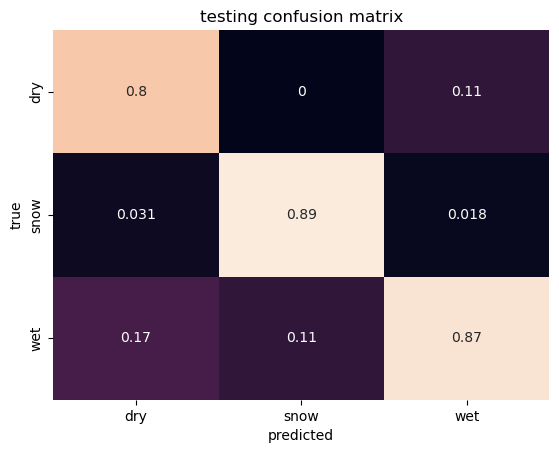

(1899, 3) (1899, 3)
.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


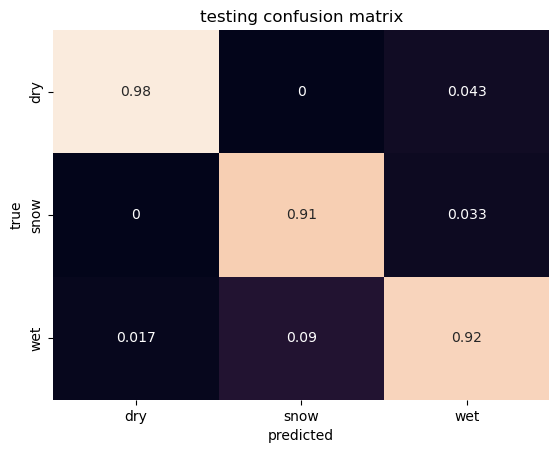

(None, 128, 128, 4)
60/60 [==============================] - 20s 132ms/step - loss: 0.2081 - clam_loss: 0.2010 - tf.math.multiply_144_loss: 8.1441 - clam_1_loss: 0.9087 - clam_categorical_accuracy: 0.9458 - clam_1_categorical_accuracy: 0.8415


[0.20811337232589722,
 0.2010137289762497,
 8.144105911254883,
 0.9087463617324829,
 0.9457609057426453,
 0.8414955139160156]

In [36]:
# '../fullrezdot/288538'
# '../random/685321'
# '../random/568735'
# '../results/806269' - highest accuracy (dot)
# '../results/411728' - highest difference (dot)
# '../random/020879' - highest difference (cd)
# '../random/568735' - highest accuracy (cd)
results = None
with open('../results/806269', 'rb') as fp:
    results = pickle.load(fp)
    
test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']

test_dset = test_dset.batch(results.config.dataset_params['batch'])

y_pred = results.model_data.get_model().predict(test_dset)
y_pred['crossentropy'].shape

from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow_datasets as tfds

y_true = tf.concat([y for x, y in tfds.as_numpy(test_dset)], 0)

print(y_pred['crossentropy'].shape, y_true.shape)

sn.heatmap(confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['crossentropy'], -1), normalize='pred'), cbar=False, annot=True, xticklabels=results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names'],
           yticklabels=results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names'])
plt.xlabel('predicted')
plt.ylabel('true')
# plt.title(metric + ' heatmap')
plt.title('testing confusion matrix')
plt.show()

print(y_pred['crossentropy'].shape, y_true.shape)

sn.heatmap(confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['all_masked'], -1), normalize='pred'), cbar=False, annot=True, xticklabels=results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names'],
           yticklabels=results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names'])
plt.xlabel('predicted')
plt.ylabel('true')
# plt.title(metric + ' heatmap')
plt.title('testing confusion matrix')
plt.show()

results.model_data.get_model().evaluate(test_dset)

.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


(None, 128, 128, 4)
60/60 [==============================] - 14s 141ms/step
(1899, 3) (1899, 3)
.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


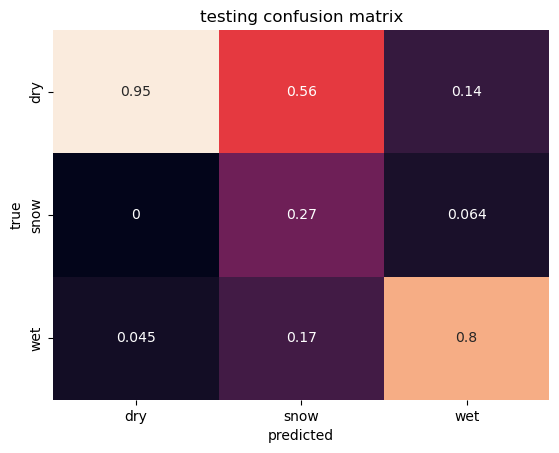

.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


.. (0): 2836.0
.. (1): 1344.0
.. (2): 2467.0
.. (0): 393.0
.. (1): 196.0
.. (2): 361.0
.. (0): 803.0
.. (1): 376.0
.. (2): 720.0



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


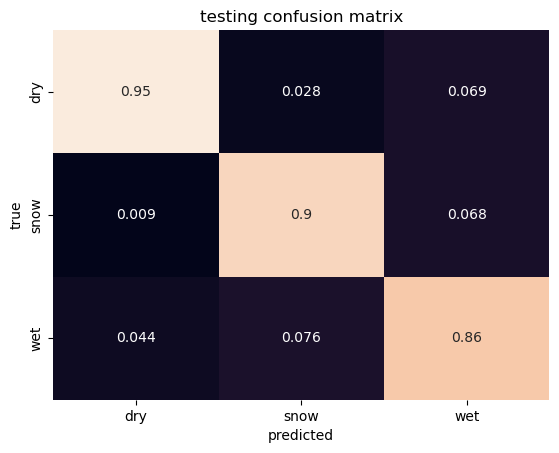

(None, 128, 128, 4)
60/60 [==============================] - 19s 133ms/step - loss: 0.8641 - clam_loss: 0.2975 - tf.math.multiply_154_loss: 3.1120 - clam_1_loss: 0.5423 - clam_categorical_accuracy: 0.9057 - clam_1_categorical_accuracy: 0.4576


[0.8641089200973511,
 0.29752615094184875,
 3.1120433807373047,
 0.5422700047492981,
 0.9057398438453674,
 0.45760926604270935]

In [37]:
results = None
with open('../results/411728', 'rb') as fp:
    results = pickle.load(fp)
    
test_dset = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['test']

test_dset = test_dset.batch(results.config.dataset_params['batch'])

y_pred = results.model_data.get_model().predict(test_dset)
y_pred['crossentropy'].shape

from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow_datasets as tfds

y_true = tf.concat([y for x, y in tfds.as_numpy(test_dset)], 0)

print(y_pred['crossentropy'].shape, y_true.shape)

confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['crossentropy'], -1), normalize='all')

sn.heatmap(confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['crossentropy'], -1), normalize='pred'), cbar=False, annot=True, xticklabels=results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names'],
           yticklabels=results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names'])
plt.xlabel('predicted')
plt.ylabel('true')
# plt.title(metric + ' heatmap')
plt.title('testing confusion matrix')
plt.show()

sn.heatmap(confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['all_masked'], -1), normalize='pred'), cbar=False, annot=True, xticklabels=results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names'],
           yticklabels=results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])['class_names'])
plt.xlabel('predicted')
plt.ylabel('true')
# plt.title(metric + ' heatmap')
plt.title('testing confusion matrix')
plt.show()

results.model_data.get_model().evaluate(test_dset)

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


tf.Tensor([[8195. 8088.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.50328565 0.49671435]], shape=(1, 2), dtype=float32) (16283, 2)


Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


tf.Tensor([[1183. 1144.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.5083799  0.49162012]], shape=(1, 2), dtype=float32) (2327, 2)


Corrupt JPEG data: 164 extraneous bytes before marker 0xd9
Corrupt JPEG data: 259 extraneous bytes before marker 0xd9
Corrupt JPEG data: 217 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1408 extraneous bytes before marker 0xd9


tf.Tensor([[2280. 2372.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.49011177 0.50988823]], shape=(1, 2), dtype=float32) (4652, 2)


Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 133 extraneous bytes before marker 0xd9

(None, 128, 128, 3)
24/24 [==============================] - 26s 813ms/step
(4652, 2) (4652, 2)


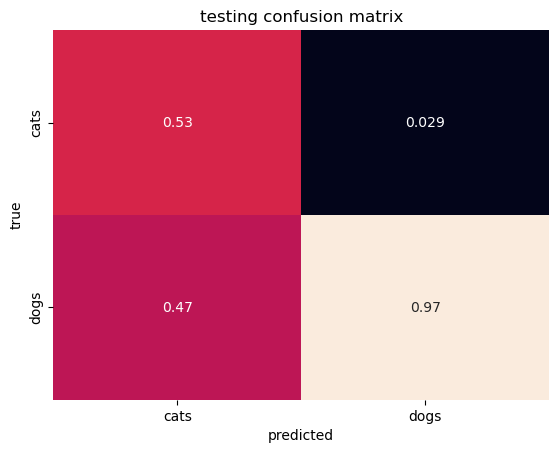

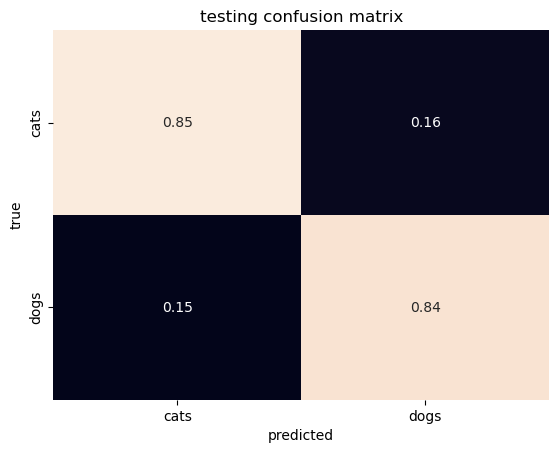

In [40]:
results = None
with open('../random/020879', 'rb') as fp:
    results = pickle.load(fp)
    
obj = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])
test_dset, class_names = obj['test'], obj['class_names']

test_dset = test_dset.batch(results.config.dataset_params['batch'])

y_pred = results.model_data.get_model().predict(test_dset)
y_pred['crossentropy'].shape

from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow_datasets as tfds

y_true = tf.concat([y for x, y in tfds.as_numpy(test_dset)], 0)

print(y_pred['crossentropy'].shape, y_true.shape)

confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['crossentropy'], -1), normalize='all')

sn.heatmap(confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['crossentropy'], -1), normalize='pred'), cbar=False, annot=True, xticklabels=class_names,
           yticklabels=class_names)
plt.xlabel('predicted')
plt.ylabel('true')
# plt.title(metric + ' heatmap')
plt.title('testing confusion matrix')
plt.show()

sn.heatmap(confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['all_masked'], -1), normalize='pred'), cbar=False, annot=True, xticklabels=class_names,
           yticklabels=class_names)
plt.xlabel('predicted')
plt.ylabel('true')
# plt.title(metric + ' heatmap')
plt.title('testing confusion matrix')
plt.show()

Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9


tf.Tensor([[8195. 8088.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.50328565 0.49671435]], shape=(1, 2), dtype=float32) (16283, 2)


Corrupt JPEG data: 133 extraneous bytes before marker 0xd9


tf.Tensor([[1183. 1144.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.5083799  0.49162012]], shape=(1, 2), dtype=float32) (2327, 2)


Corrupt JPEG data: 164 extraneous bytes before marker 0xd9
Corrupt JPEG data: 259 extraneous bytes before marker 0xd9
Corrupt JPEG data: 217 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1408 extraneous bytes before marker 0xd9


tf.Tensor([[2280. 2372.]], shape=(1, 2), dtype=float32) tf.Tensor([[0.49011177 0.50988823]], shape=(1, 2), dtype=float32) (4652, 2)


Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 104 extraneous bytes before marker 0xd9
Corrupt JPEG data: 402 extraneous bytes before marker 0xd9
Corrupt JPEG data: 70 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 242 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1158 extraneous bytes before marker 0xd9
Corrupt JPEG data: 232 extraneous bytes before marker 0xd9
Corrupt JPEG data: 133 extraneous bytes before marker 0xd9

(None, 128, 128, 3)
24/24 [==============================] - 26s 812ms/step
(4652, 2) (4652, 2)


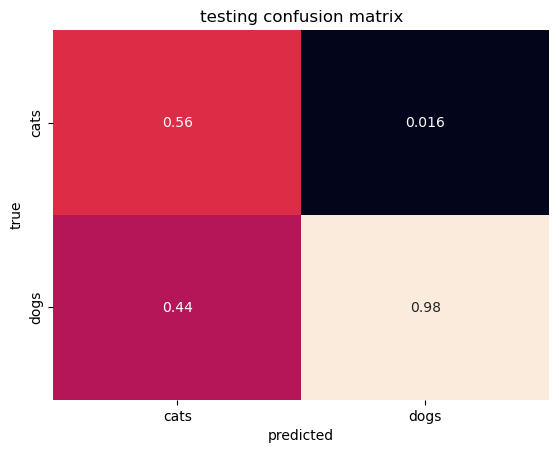

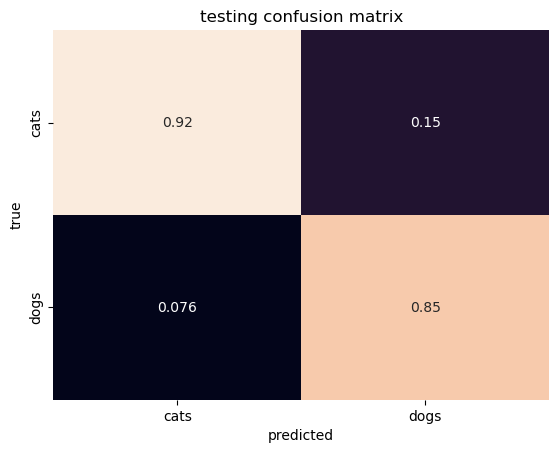

In [41]:
results = None
with open('../random/568735', 'rb') as fp:
    results = pickle.load(fp)

obj = results.config.dataset_params['dset_fn'](**results.config.dataset_params['dset_args'])
test_dset, class_names = obj['test'], obj['class_names']

test_dset = test_dset.batch(results.config.dataset_params['batch'])

y_pred = results.model_data.get_model().predict(test_dset)
y_pred['crossentropy'].shape

from sklearn.metrics import confusion_matrix
import tensorflow as tf
import tensorflow_datasets as tfds

y_true = tf.concat([y for x, y in tfds.as_numpy(test_dset)], 0)

print(y_pred['crossentropy'].shape, y_true.shape)

confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['crossentropy'], -1), normalize='all')

sn.heatmap(confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['crossentropy'], -1), normalize='pred'), cbar=False, annot=True, xticklabels=class_names,
           yticklabels=class_names)
plt.xlabel('predicted')
plt.ylabel('true')
# plt.title(metric + ' heatmap')
plt.title('testing confusion matrix')
plt.show()

sn.heatmap(confusion_matrix(tf.argmax(y_true, -1), tf.argmax(y_pred['all_masked'], -1), normalize='pred'), cbar=False, annot=True, xticklabels=class_names,
           yticklabels=class_names)
plt.xlabel('predicted')
plt.ylabel('true')
# plt.title(metric + ' heatmap')
plt.title('testing confusion matrix')
plt.show()